In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
%matplotlib inline

In [2]:
conn = sqlite3.connect('Data/HMTG_possib_remote.db')
dat = pd.read_sql_query('SELECT * FROM trials A INNER JOIN subjects B ON A.subject_id = B.id WHERE B.bonus NOTNULL', conn)
dat

,id,trl,p1_pic,inv,mult,pred,ret,reason,reason_start,reason_rt,subject_id,id,subID,prolific_id,trustee_id,trial_order,bonus,exp_feedback
0,1,0,78,5,6,9,10,he wants the other person to think he's being ...,17915.0,2944.0,2,2,labmember,0.15991529500550383,93,1,2.0,None
1,2,1,78,4,2,1,6,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
2,3,2,78,5,4,8,10,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
3,4,3,78,5,2,8,7,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
4,5,4,78,2,2,3,3,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
5,6,5,77,5,2,9,8,he doesn't want the other person to be disappo...,18299.0,848.0,2,2,labmember,0.15991529500550383,93,1,2.0,None
6,7,6,76,8,4,17,16,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
7,8,7,75,10,2,17,15,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None
8,9,8,78,5,2,7,7,he wants (mostly) wants to fulfill their expec...,66148.0,1647.0,2,2,labmember,0.15991529500550383,93,1,2.0,None
9,10,9,76,10,6,20,20,n/a,NaN,NaN,2,2,labmember,0.15991529500550383,93,1,2.0,None


# Learning  = Prediction Errors over time

In [3]:
# Make errors between 0 and 1
dat['pe'] = abs((dat.pred/(dat.mult*dat.inv)) - (dat.ret/(dat.mult*dat.inv)))

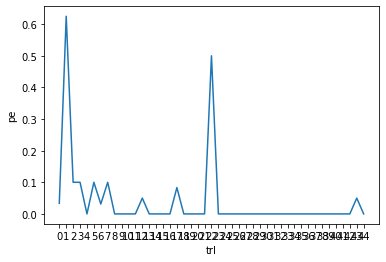

In [4]:
sns.lineplot(x='trl', y='pe', data=dat)

In [5]:
dat['probe_trl'] = dat.reason != 'n/a'

# Let's try NLP stuff FML

In [2]:
#from absl-py import logging

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

def embed(input):
  return model(input)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
#logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))